#Question 1: MATH: K-means Clustering

In k-means clustering, the goal is to minimize the sum of squared distances between each data point and the centroid of the cluster to which it belongs.

### Part (a)

**Question:** What is the minimum value of the objective when \( k = n \) (the number of clusters equals the number of samples)?

#### Step-by-step solution:

1. **Objective Definition**:
   $$[
   \min_{C_1, C_2, \ldots, C_k} \sum_{i=1}^k \sum_{x_j \in C_i} \|x_j - \mu_i\|^2
   ] $$
   Here, $( \mu_i )$ is the mean (centroid) of points in cluster $( C_i )$.

2. **When \( k = n \)**:
   - Each cluster $( C_i )$ contains exactly one sample $( x_i )$.
   - This means $( \mu_i = x_i )$ since the mean of a single point is the point itself.

3. **Objective Calculation**:
   - The sum $( \sum_{x_j \in C_i} \|x_j - \mu_i\|^2 )$ within each cluster $( C_i )$ becomes $( \|x_i - x_i\|^2 = 0 )$ because the distance between any point and itself is zero.

4. **Overall Objective**:
   - Since this is true for all \( i \), the total sum is:
     $$\[
     \sum_{i=1}^k \sum_{x_j \in C_i} \|x_j - \mu_i\|^2 = \sum_{i=1}^n 0 = 0
     \]$$

#### Conclusion:
The minimum value of the objective when \( k = n \) is 0.

### Robustness Check and Code for Visualization:
I wanted to run a robustness check to ensure I'm on the right track. For the robustness check, we can simulate a small example with \( n \) points, perform k-means clustering with \( k = n \), and observe the objective value.

To verify:

In [1]:
import numpy as np
from sklearn.cluster import KMeans

# Create an example dataset
data = np.array([[1, 2], [3, 4], [5, 6]])

# Number of clusters is equal to the number of samples
k = len(data)

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

# Calculate the objective value
objective_value = sum(np.min(np.sum((data[:, np.newaxis] - kmeans.cluster_centers_)**2, axis=2), axis=0))

print("Objective Value: ", objective_value)


Objective Value:  0.0


### Part (c) Ridesharing Objective Function Using Regularized k-means

**Question:** Define an appropriate objective function to solve the ridesharing problem, where students need to minimize the total distance that all vehicles need to travel to a CGU, assuming k vehicles are available.

We have \( n \) students each located at $( x_j )$ in a 2D Euclidean world who need to travel to CGU Math North house at the origin \((0, 0)\) for a graduate-level ML course. The university has provided \( k \) vehicles, indicating there should be \( k \) meet-up points. Students drive to the nearest meet-up point, and from there, shuttles transport them to the university.

### Objective Function Formulation

#### **Key Components:**
1. **Distance from Students to Meet-up Points:**
   - **Mathematical Expression:** $( \|x_j - \mu_i\|^2 )$
   - **Explanation:** Each student $( x_j )$ needs to travel to the closest meet-up point $( \mu_i )$. The expression $( \|x_j - \mu_i\|^2 )$ calculates the squared Euclidean distance between student \( j \) and meet-up point \( i \). Squaring the distance ensures that larger discrepancies are heavily penalized, which helps in accurately minimizing the total travel distance.

2. **Regularization for Meet-up Point Proximity to CGU:**
   - **Mathematical Expression:** $( \lambda \| \mu_i \|^2 )$
   - **Explanation:** To ensure meet-up points are not too far from CGU (the origin), a regularization term $( \lambda \| \mu_i \|^2 )$ is added. This term penalizes the distance of meet-up points from the origin, weighted by $( \lambda )$. The regularization helps balance the meet-up locations to avoid situations where meet-up points are optimally close to students but impractically far from CGU, thus saving on shuttle travel distances.

#### Problem Setup:

1. **Variables**:
   - $( x_j )$ is the location of student $( j )$ in $( \mathbb{R}^2 )$.
   - $( \mu_i )$ is the location of the meetup point for vehicle \( i \).
   - $( C_i )$ is the set of students assigned to vehicle \( i \).
   - The exam location is at the origin, (0,0).

2. **Objective**:
   - Minimize the total distance traveled by all vehicles, which involves the sum of distances from the meetup points $( \mu_i )$ to the origin, and the sum of distances from each student to their respective meetup point.

#### **Formulating the Objective**:

The regularized k-means objective can be adapted here to account for both the distance students travel to the meetup points and the distance vehicles travel from the meetup points to the exam location at CGU. This can be expressed as:

$$[
\min_{\mu_1, \ldots, \mu_k} \sum_{i=1}^k \left( \lambda \|\mu_i\|^2 + \sum_{x_j \in C_i} \|x_j - \mu_i\|^2 \right)
]$$

Here:
- $( \lambda \|\mu_i\|^2 )$ represents the cost of driving from meetup point $( \mu_i )$ to the exam location, emphasizing that meetup points should be closer to the exam location to minimize travel. $ \lambda $ is a weighting factor that can be adjusted based on the relative importance of minimizing shuttle travel vs. student travel.
- $( \sum_{x_j \in C_i} \|x_j - \mu_i\|^2 )$ represents the total squared Euclidean distance that students in cluster \( i \) travel to get to the meetup point \( \mu_i \).

#### **Solution**:

To minimize this objective, we must determine the optimal locations $ \mu_i $ for each vehicle's meetup point such that the weighted sum of the distances is minimized. Given the regularized term, the optimal $\ \mu_i $ can be influenced to be closer to the origin than the simple average of $ x_j $ in $ C_i $.

#### **Why Squared Distances?**
- **Impact of Squaring:** Squaring the distances both $( ( \|x_j - \mu_i\|^2 )$ and  $( \| \mu_i \|^2 ))$ places greater emphasis on reducing larger distances. This is crucial in a ridesharing context because it ensures that solutions do not disproportionately favor shorter trips at the expense of significantly longer ones, thus achieving a more equitable distribution of travel burdens among students.

#### **Role of Regularization Parameter $( \lambda )$:**
- **Balancing Factor:** $( \lambda )$ acts as a tuning knob that controls how strongly the meet-up points should be pulled towards the origin. A higher $( \lambda )$ means more emphasis on reducing shuttle distances, potentially at the cost of increased student travel distances to the meet-up points.
- **Optimization Trade-off:** By adjusting $( \lambda )$, one can find an optimal balance where the combined travel distance (students to meet-up points and shuttles to CGU) is minimized. This balance is crucial for operational efficiency and cost-effectiveness in the transportation plan.

### Visualization Code:

I created a simple visualization with a few students and potential meetup points to demonstrate how changes in $ \lambda $ affect the positions of $ \mu_i $.

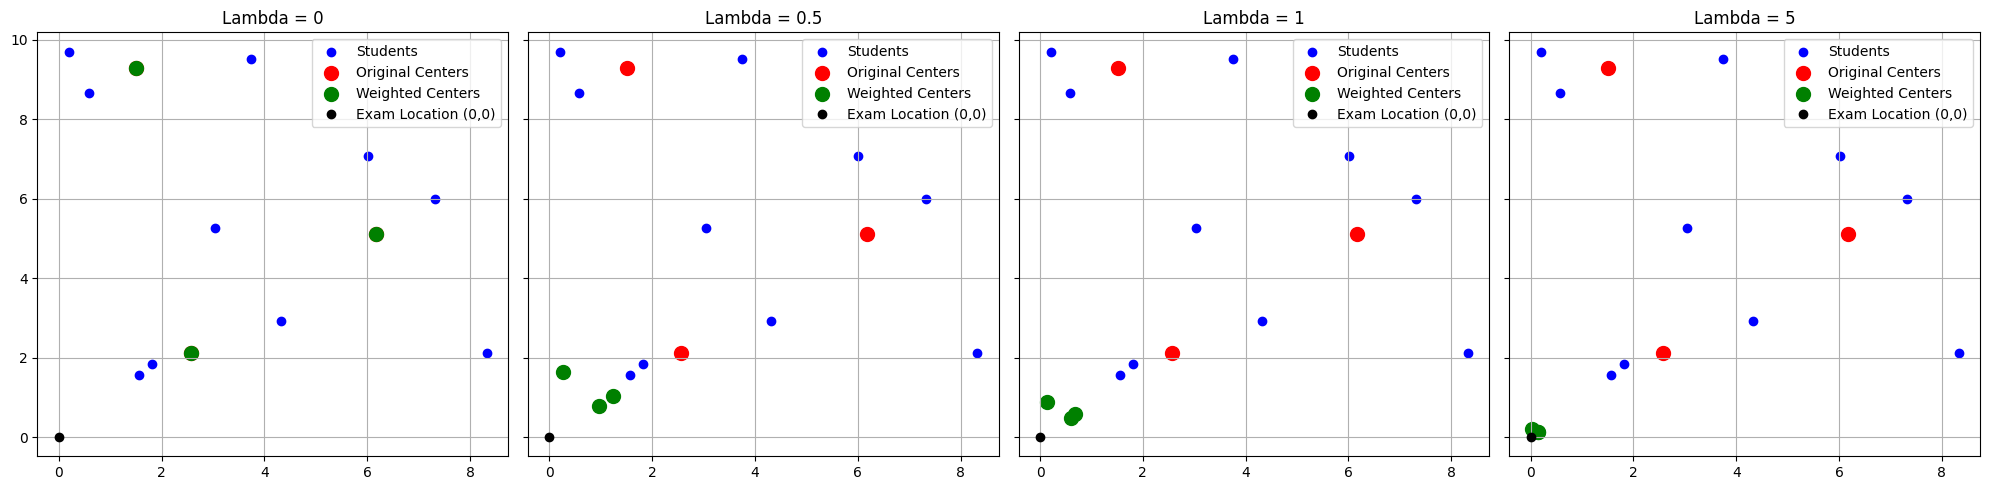

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Simulating student locations in R2
np.random.seed(42)
student_locations = np.random.rand(10, 2) * 10  # 10 students

# Number of vehicles
k = 3

# Different values of lambda to show the effect on meetup points
lambdas = [0, 0.5, 1, 5]

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
axes = axes.ravel()

for i, lam in enumerate(lambdas):
    # Weighted K-means clustering
    # Adjusted cluster centers by lambda
    kmeans = KMeans(n_clusters=k, random_state=0).fit(student_locations)
    cluster_centers = kmeans.cluster_centers_

    # Adjusting cluster centers towards the origin
    weighted_centers = cluster_centers / (1 + lam * np.linalg.norm(cluster_centers, axis=1, keepdims=True))

    # Plotting
    axes[i].scatter(student_locations[:, 0], student_locations[:, 1], color='blue', label='Students')
    axes[i].scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', s=100, label='Original Centers')
    axes[i].scatter(weighted_centers[:, 0], weighted_centers[:, 1], color='green', s=100, label='Weighted Centers')
    axes[i].plot(0, 0, 'ko', label='Exam Location (0,0)')
    axes[i].set_title(f'Lambda = {lam}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Adding a detailed explanation of the regularization impact and adjusting the code to more explicitly show the effect of
𝜆
on the centroids' movement towards the origin. Visualizing this:

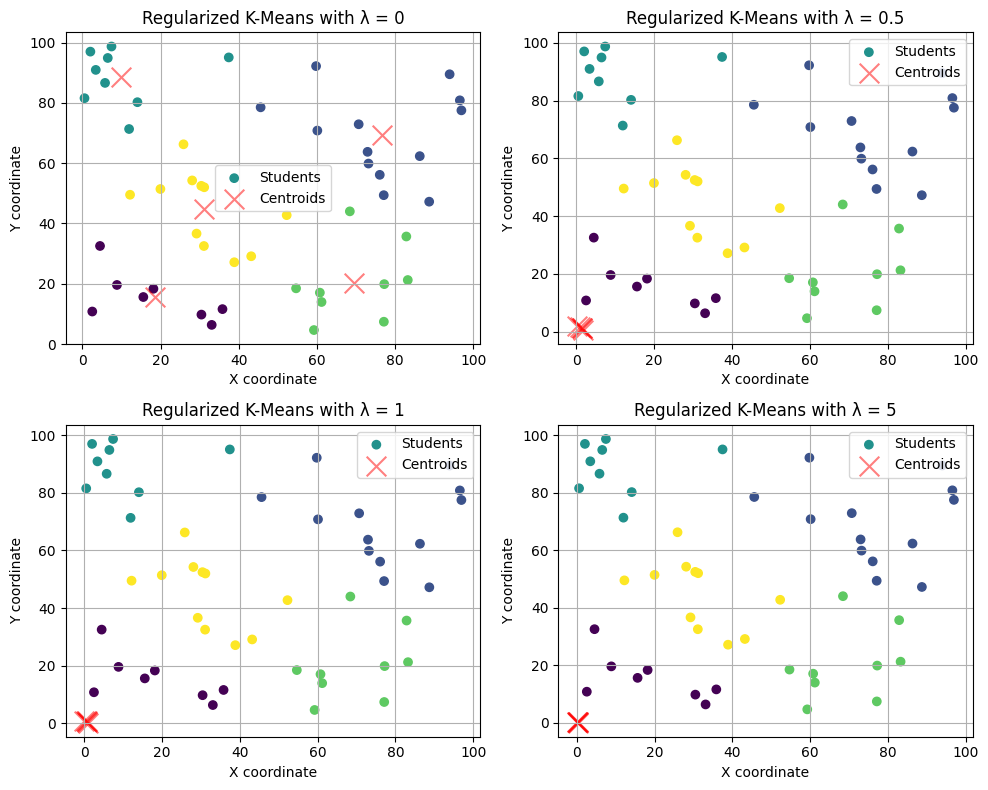

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random student locations in a 2D space
np.random.seed(42)
student_locations = np.random.rand(50, 2) * 100  # 50 students in a 100x100 grid

# Regularized K-means function
def regularized_k_means(data, k, lambda_reg):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    centroids = kmeans.cluster_centers_

    # Adjust centroids towards the origin based on lambda
    adjusted_centroids = centroids / (1 + lambda_reg * np.linalg.norm(centroids, axis=1, keepdims=True))
    return kmeans.labels_, adjusted_centroids

# Visualizing the effect of lambda on centroids
def plot_regularized_k_means(data, lambda_values=[0, 0.5, 1, 5]):
    k = 5  # number of clusters
    plt.figure(figsize=(10, 8))
    for i, lambda_reg in enumerate(lambda_values):
        labels, centroids = regularized_k_means(data, k, lambda_reg)
        plt.subplot(2, 2, i + 1)
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Students')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='x', label='Centroids')
        plt.title(f'Regularized K-Means with λ = {lambda_reg}')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_regularized_k_means(student_locations)


----------------------

-----------------

#QUESTION 2 : CODING: Mirroring Ch 9, Problem 10 to a different dataset- MNIST

I chose **the MNIST dataset** which is a classic in the field of machine learning, containing images of handwritten digits (0-9). Each image is 8x8 pixels, flattened into 64-dimensional vectors for processing.

The data is split into Training and Test Sets.

I then use Stratified sampling to ensure that both the training and test sets have examples of each class of digits.

PCA is then used to reduce the dimensionality while retaining 95% of the variance in the data. This step simplifies the dataset, reducing computational requirements and potentially improving clustering performance.

The Silhouette Score is also plotted.

The next step is to use K-means Clustering

We explore different numbers of clusters to find the best configuration based on silhouette scores, which assess how similar each point is to its cluster compared to other clusters. We then visualize the same.

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

# Step 2: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist.data
y_mnist = mnist.target.astype(np.int64)


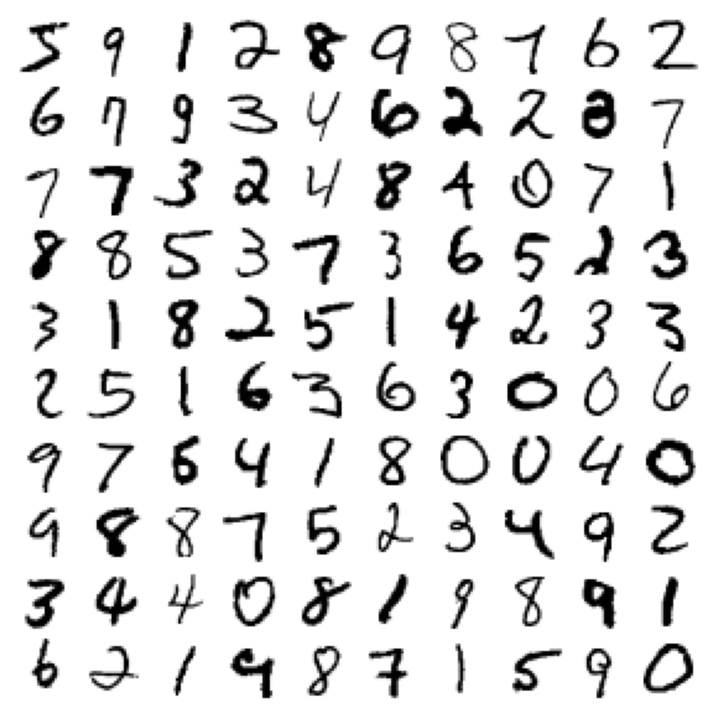

In [ ]:
# Step 3: Reshape and display some images to verify the dataset
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=plt.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X_mnist[:12000:600], X_mnist[13000:30600:600], X_mnist[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [ ]:
# Step 4: K-Means clustering to find representative images
k = 50  # Adjust this to your scenario, it represents the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_mnist)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_mnist[representative_digit_idx]

# Step 5: Train a logistic regression model on these representative images
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_representative_digits, y_mnist[representative_digit_idx])

# Step 6: Evaluate the model on the whole dataset
score = log_reg.score(X_mnist, y_mnist)
print(f'Accuracy of the model: {score * 100:.2f}%')


I wanted to also experiment with changing the Principal component analysis (PCA)

I tried to visualize  both 8x8 and 28x28 images to demonstrate the characteristics of different datasets - the digits dataset from sklearn and the MNIST dataset

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the digits dataset (8x8)
digits = load_digits()
X_digits = digits.data  # Image data in flattened form
y_digits = digits.target  # Labels for the images

# Load the MNIST dataset (28x28) from OpenML
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data
y_mnist = mnist.target


In [7]:
# Display the shape of the datasets
print("Digits Data shape:", X_digits.shape)
print("Digits Label shape:", y_digits.shape)
print("MNIST Data shape:", X_mnist.shape)
print("MNIST Label shape:", y_mnist.shape)



Digits Data shape: (1797, 64)
Digits Label shape: (1797,)
MNIST Data shape: (70000, 784)
MNIST Label shape: (70000,)


In [8]:
# Define function to plot both types of digits
def plot_digits(instances, size=8, images_per_row=10, title="Digits"):
    if size == 28:
        instances = instances.reshape(-1, 28, 28)  # Reshape flat images back to 28x28 if needed
    else:
        instances = instances.reshape(-1, 8, 8)  # Reshape flat images back to 8x8 for the digits dataset
    plt.figure(figsize=(9, 9))
    for i in range(min(len(instances), images_per_row * (len(instances) // images_per_row + 1))):
        plt.subplot(len(instances) // images_per_row + 1, images_per_row, i + 1)
        plt.imshow(instances[i], cmap=plt.cm.binary, interpolation='nearest')
        plt.axis("off")
    plt.title(title)
    plt.show()



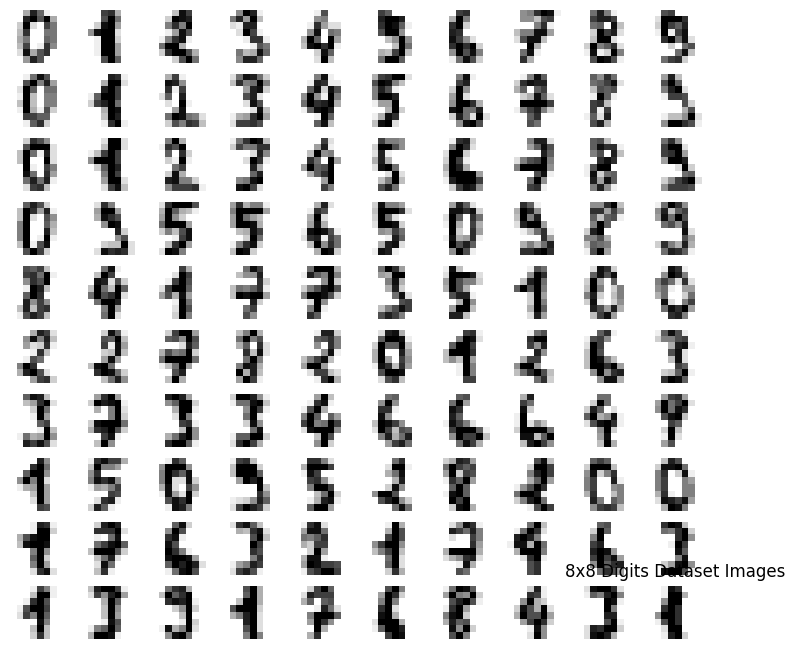

In [9]:
# Display the first 100 images from the Digits dataset (8x8)
plot_digits(X_digits[:100], size=8, images_per_row=10, title="8x8 Digits Dataset Images")



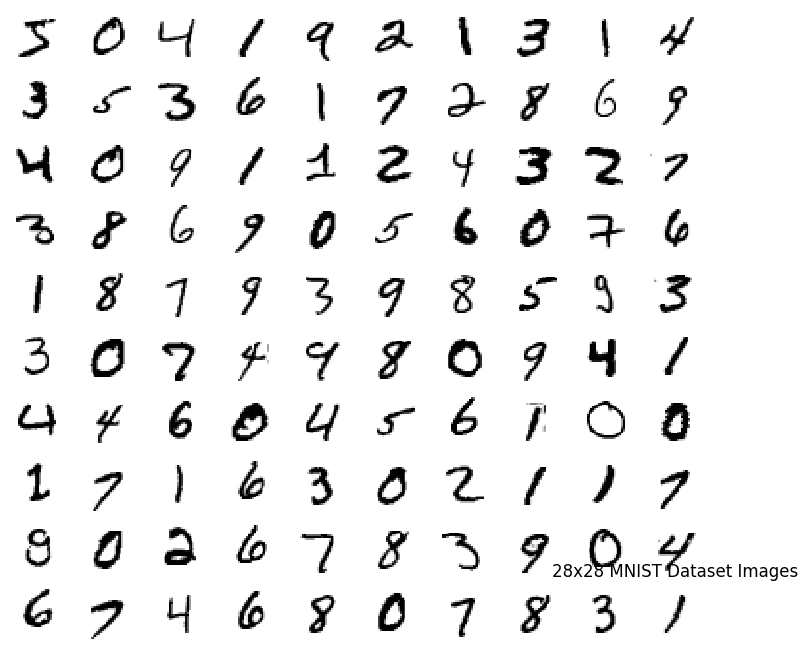

In [10]:
# Display the first 100 images from the MNIST dataset (28x28)
plot_digits(X_mnist[:100].values, size=28, images_per_row=10, title="28x28 MNIST Dataset Images")



In [11]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform K-means clustering
k_range = range(5, 50, 5)
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train_pca) for k in k_range]
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_model = kmeans_per_k[best_index]



The Silhouette Scores are then plotted

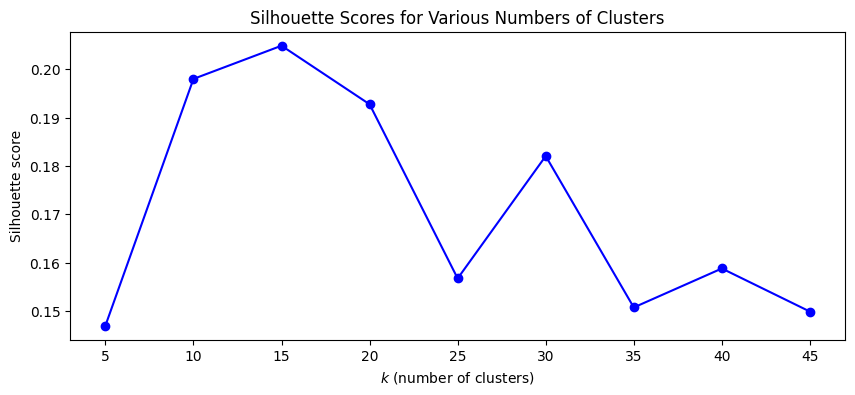

In [12]:
# Plot silhouette scores
plt.figure(figsize=(10, 4))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$ (number of clusters)")
plt.ylabel("Silhouette score")
plt.title("Silhouette Scores for Various Numbers of Clusters")
plt.show()



Cluster 0 samples: 144


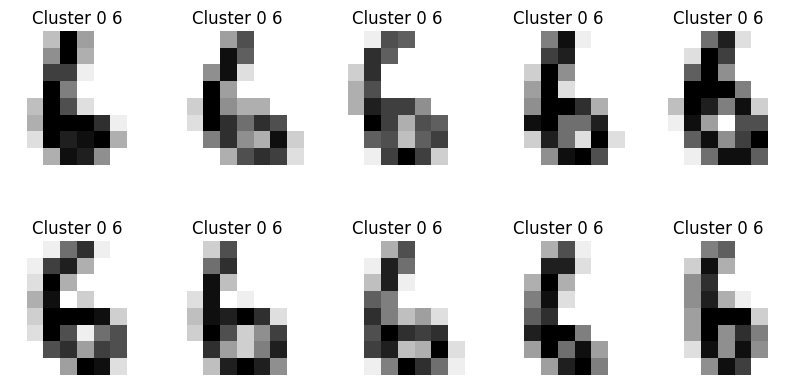

Cluster 1 samples: 128


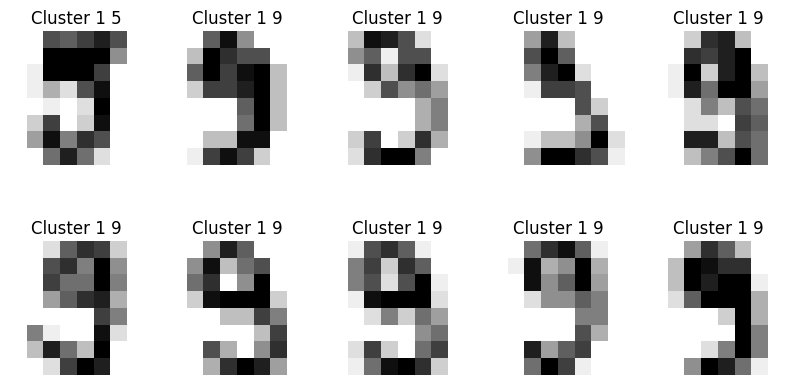

Cluster 2 samples: 76


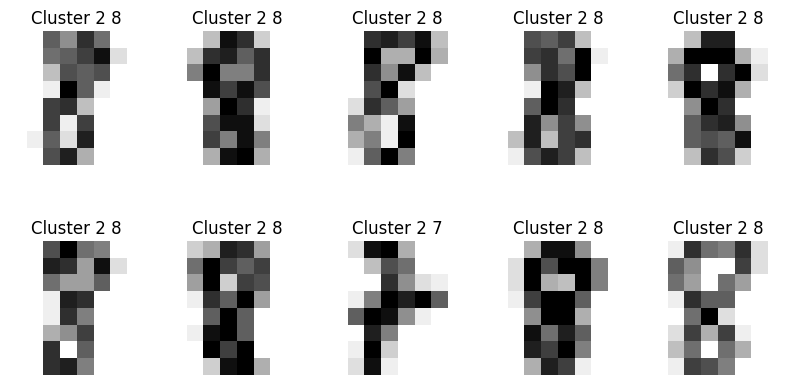

Cluster 3 samples: 129


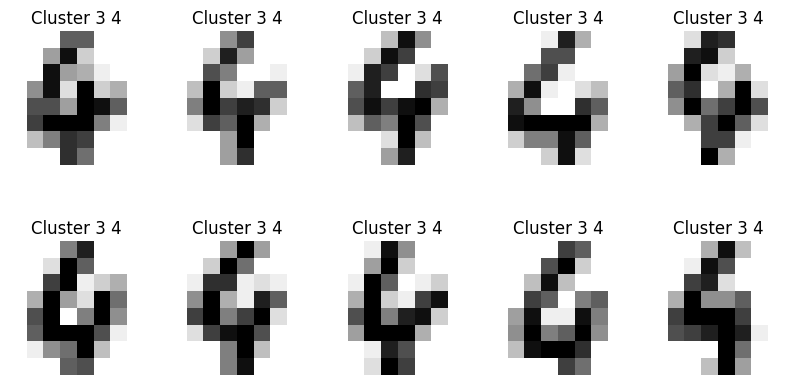

Cluster 4 samples: 87


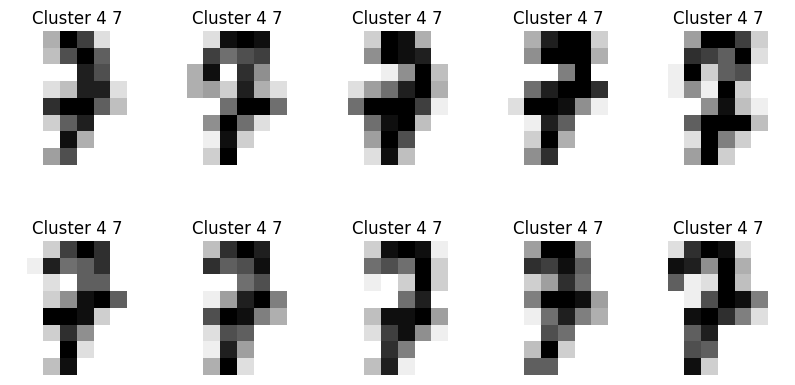

Cluster 5 samples: 60


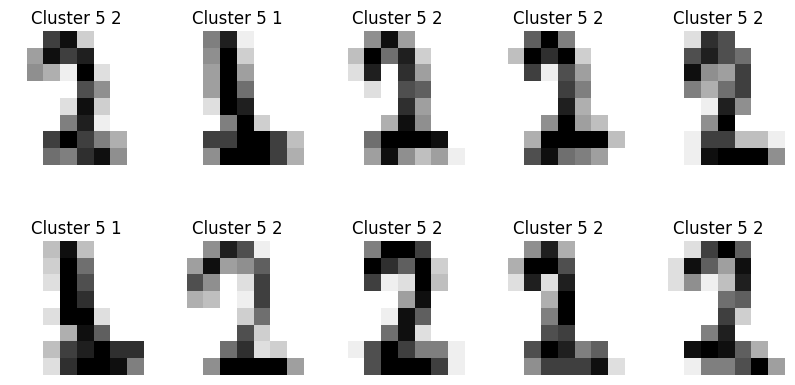

Cluster 6 samples: 143


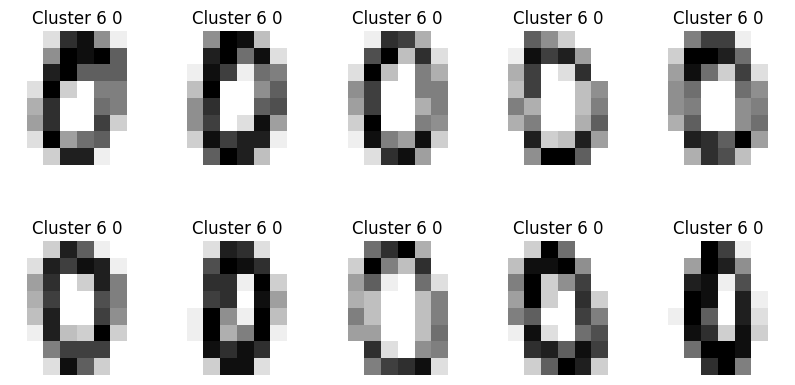

Cluster 7 samples: 63


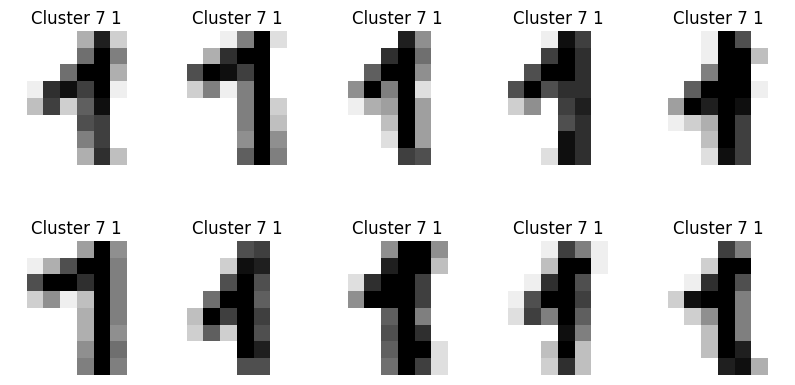

Cluster 8 samples: 77


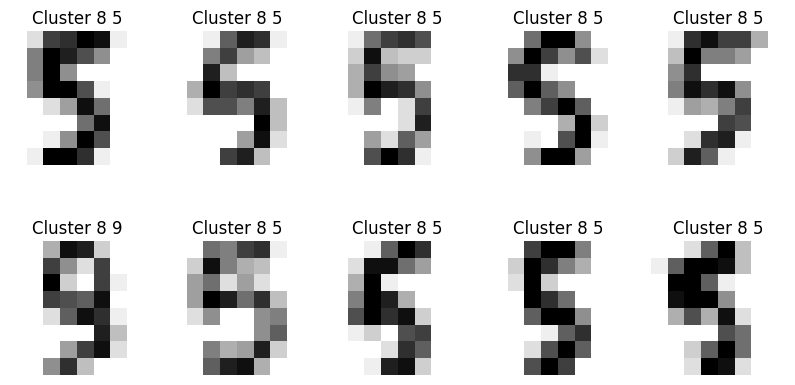

Cluster 9 samples: 120


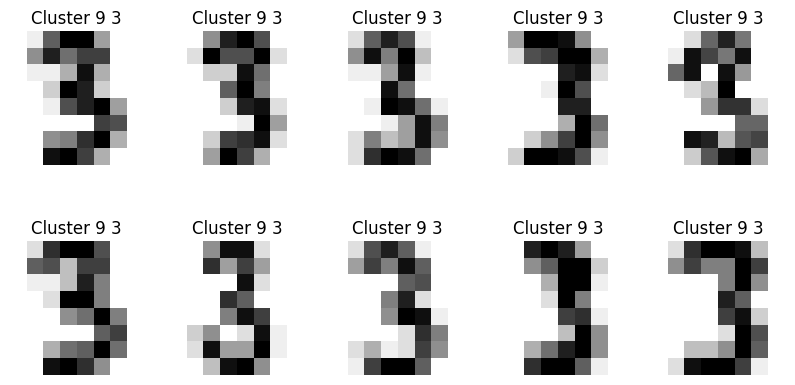

Cluster 10 samples: 64


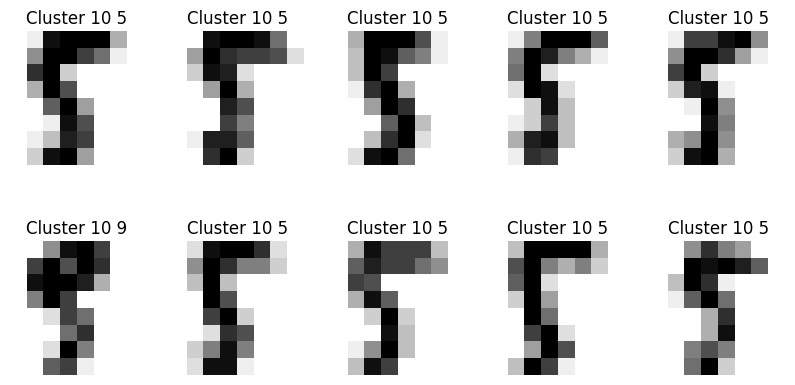

Cluster 11 samples: 93


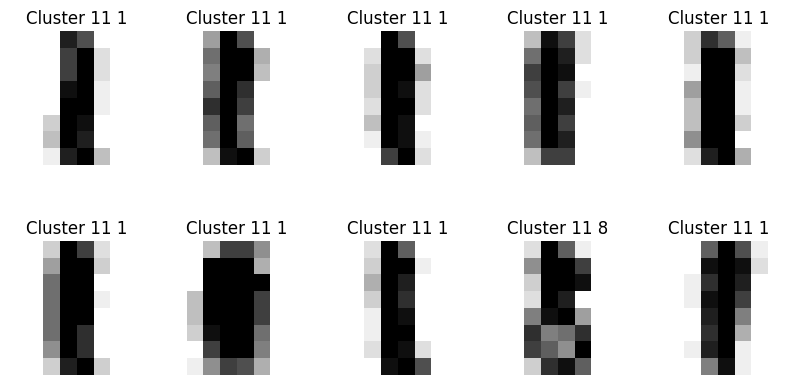

Cluster 12 samples: 88


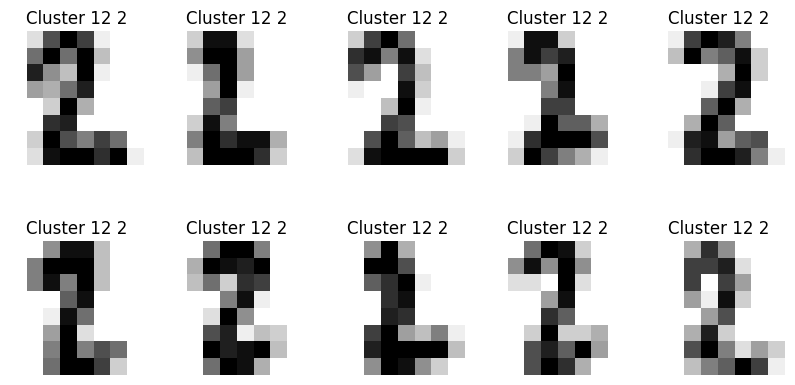

Cluster 13 samples: 76


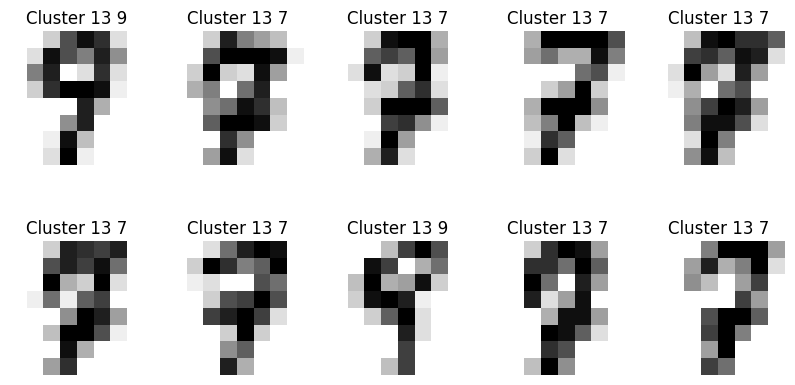

Cluster 14 samples: 89


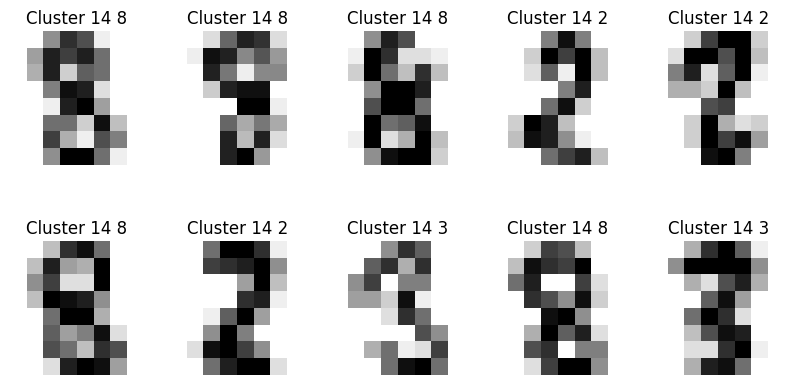

In [13]:
# Function to plot digits from clusters
def plot_cluster_digits(data, labels, title="Cluster"):
    plt.figure(figsize=(10, 5))
    n = min(len(data), 10)  # Limit to 10 images per cluster
    for i in range(n):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest')
        plt.title(f"{title} {labels[i]}")
        plt.axis('off')
    plt.show()

# Plotting digits from each cluster
for k in range(best_k):
    mask = (best_model.labels_ == k)
    cluster_samples = X_train[mask]
    cluster_labels = y_train[mask]
    print(f"Cluster {k} samples:", len(cluster_samples))
    plot_cluster_digits(cluster_samples, cluster_labels, title=f"Cluster {k}")

Playing around with this a little bit more --

The code below adds a function, display_original_digits, that plots 100 of the original 8x8 images from the digits dataset right after displaying the clusters. This function is invoked immediately after the cluster visualization, providing a clear look at the unprocessed digit images used in the PCA and K-means analysis.

Cluster 0 samples: 144


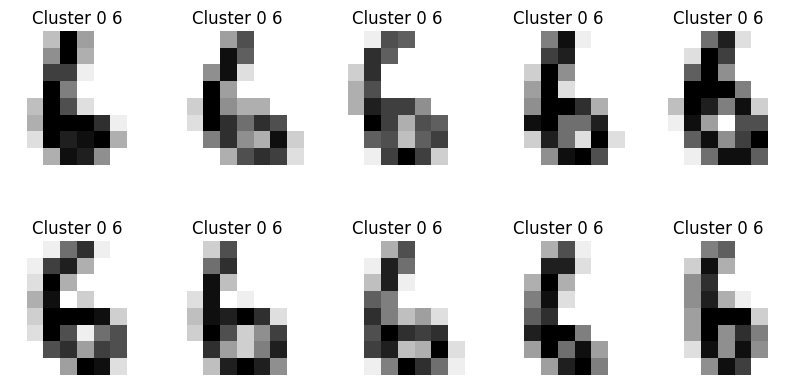

Cluster 1 samples: 128


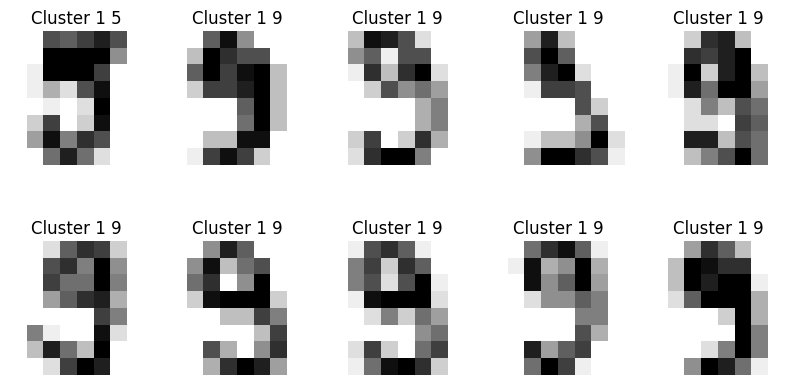

Cluster 2 samples: 76


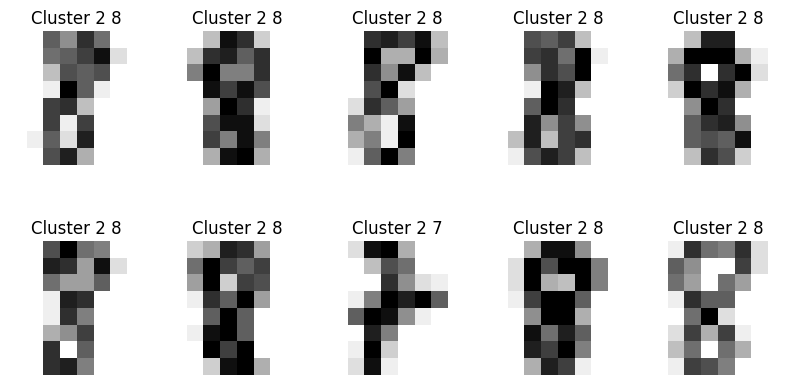

Cluster 3 samples: 129


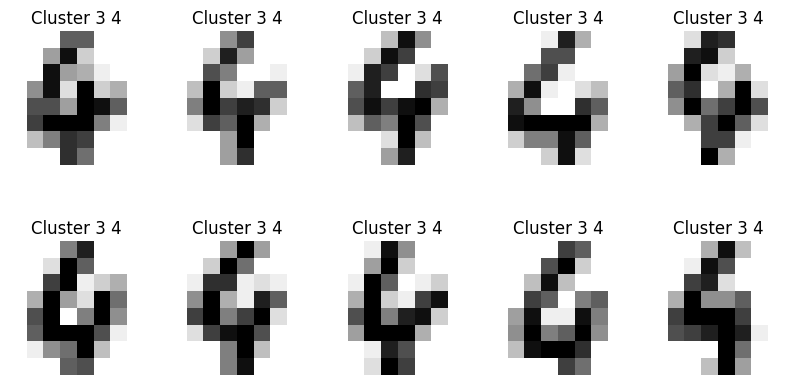

Cluster 4 samples: 87


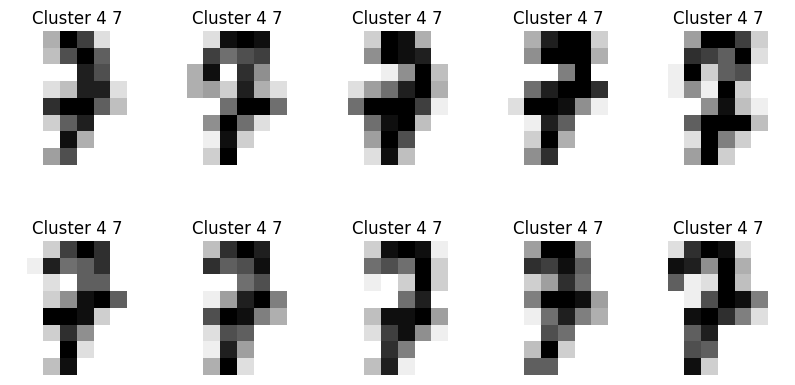

Cluster 5 samples: 60


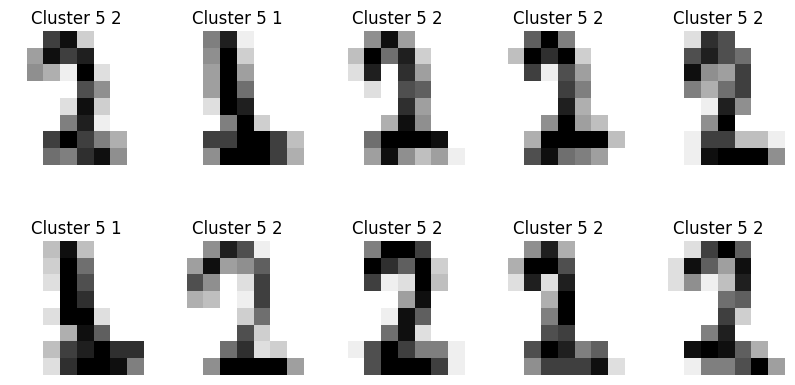

Cluster 6 samples: 143


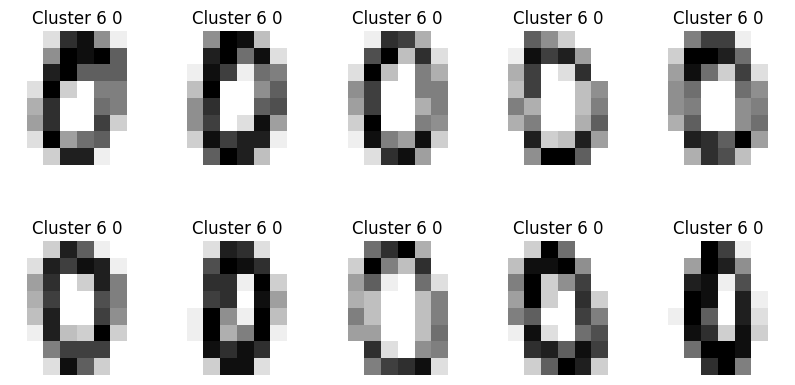

Cluster 7 samples: 63


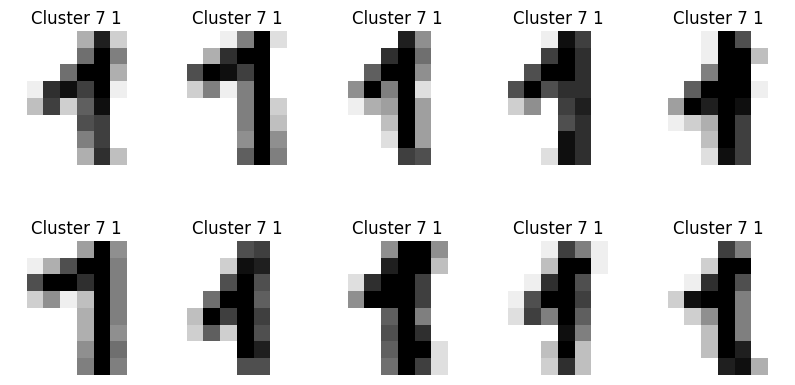

Cluster 8 samples: 77


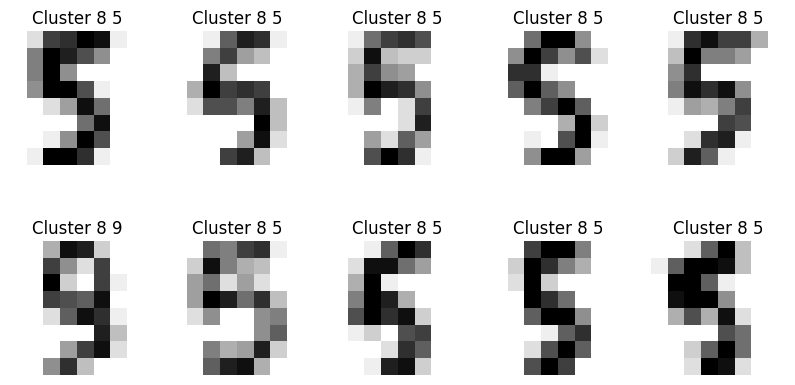

Cluster 9 samples: 120


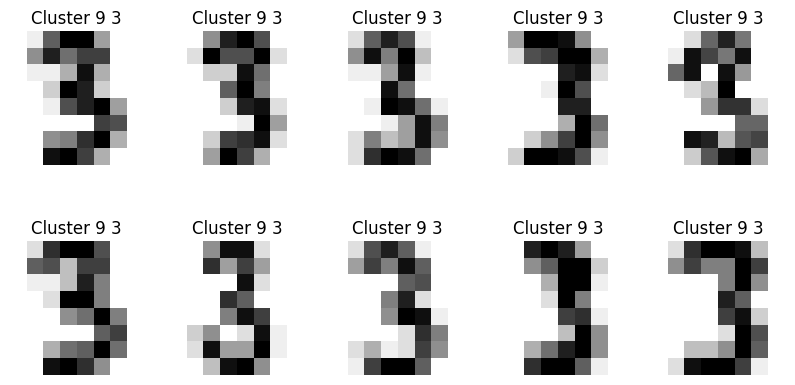

Cluster 10 samples: 64


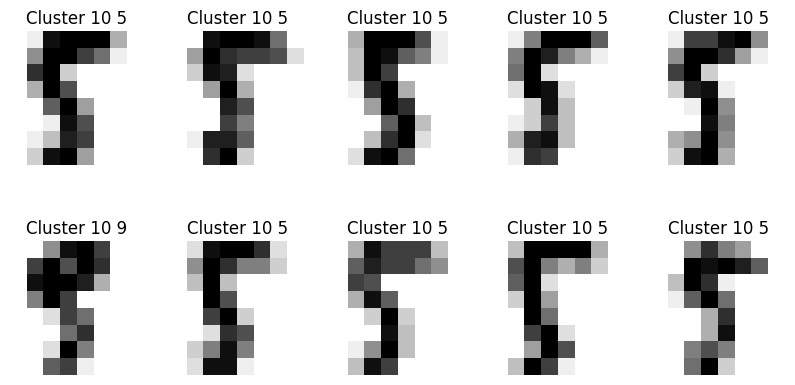

Cluster 11 samples: 93


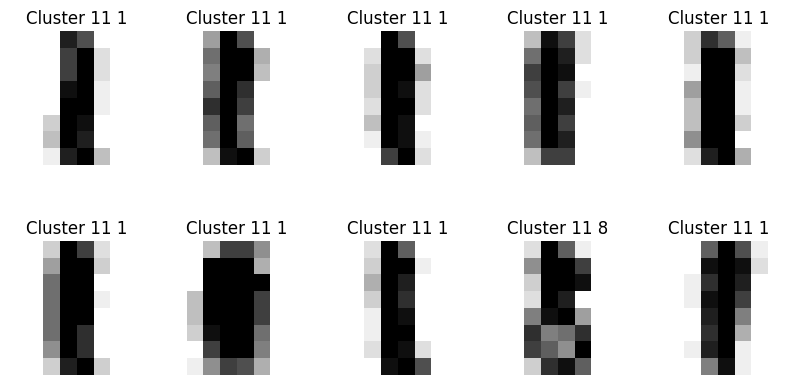

Cluster 12 samples: 88


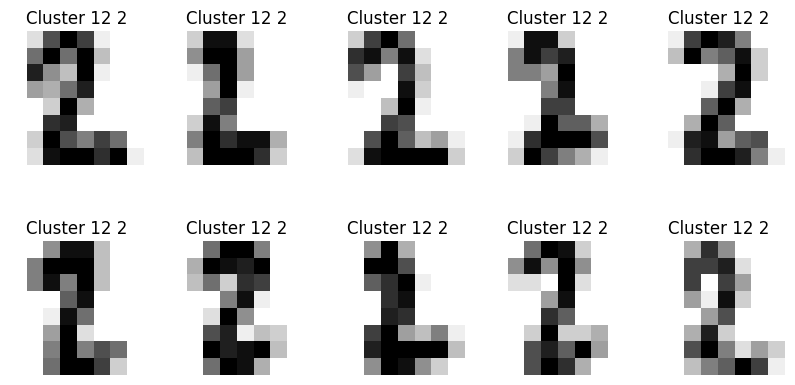

Cluster 13 samples: 76


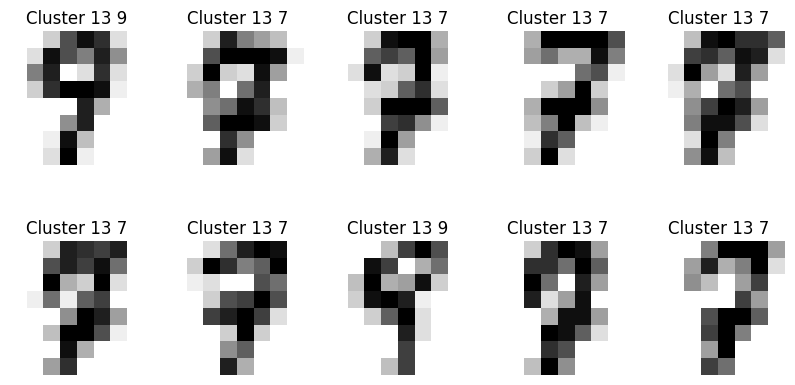

Cluster 14 samples: 89


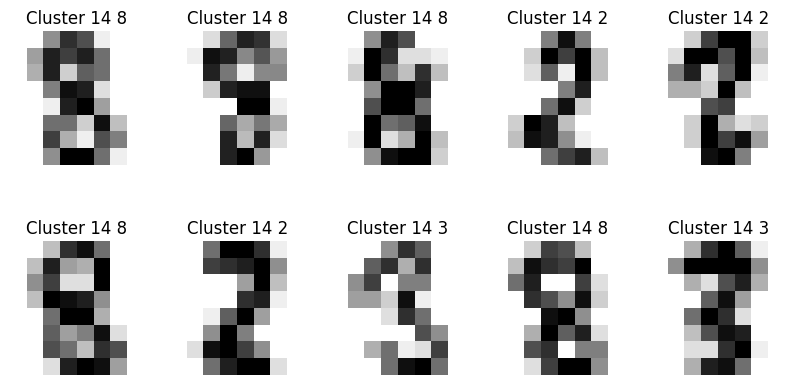

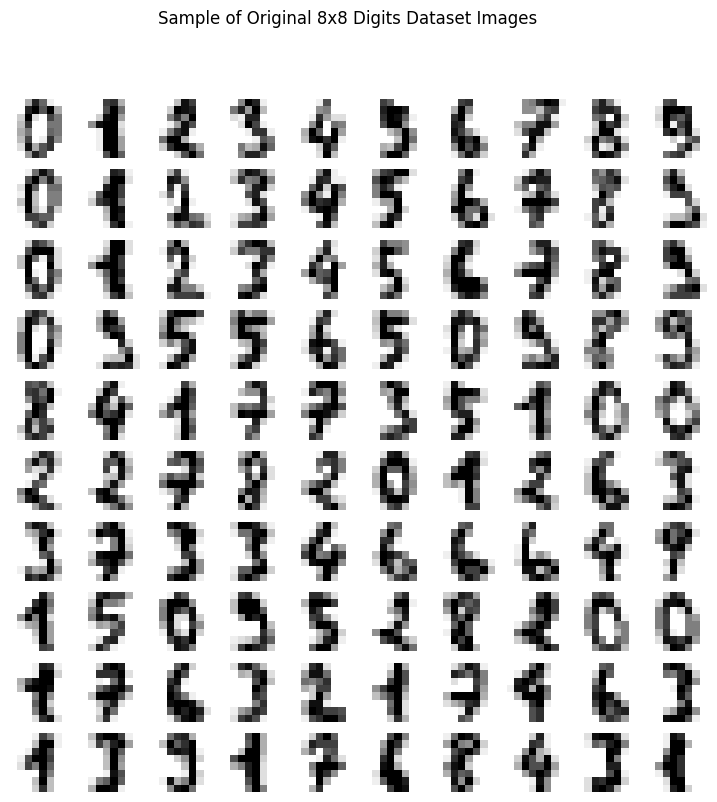

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the digits dataset
digits = load_digits()
X = digits.data  # Image data in flattened form
y = digits.target  # Labels for the images

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform K-means clustering
k_range = range(5, 50, 5)
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train_pca) for k in k_range]
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_model = kmeans_per_k[best_index]

# Function to plot a selection of digits from each cluster
def plot_digits(data, labels, title="Cluster"):
    plt.figure(figsize=(10, 5))
    n = min(len(data), 10)  # Limit to 10 images per cluster
    for i in range(n):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest')
        plt.title(f"{title} {labels[i]}")
        plt.axis('off')
    plt.show()

# Plotting digits from each cluster
for k in range(best_k):
    mask = (best_model.labels_ == k)
    cluster_samples = X_train[mask]
    cluster_labels = y_train[mask]
    print(f"Cluster {k} samples:", len(cluster_samples))
    plot_digits(cluster_samples, cluster_labels, title=f"Cluster {k}")

# Additional Visualization to demonstrate the original 8x8 images from the dataset
def display_original_digits():
    plt.figure(figsize=(9, 9))
    n_images = 100  # Number of images to display
    images_per_row = 10
    for i in range(n_images):
        plt.subplot(n_images // images_per_row, images_per_row, i + 1)
        plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.binary, interpolation='nearest')
        plt.axis("off")
    plt.suptitle("Sample of Original 8x8 Digits Dataset Images")
    plt.show()

# Display the original digits to see what they look like before any processing
display_original_digits()
